# Project

**Task: Predict the price and cut of diamonds. Do 2 predictions!**

## Data Analysis

In [115]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Data Understanding

Load the dataset.

In [116]:
diamonds = pd.read_csv("diamonds_FSAI_SoSe22.csv", index_col="Unnamed: 0")
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.83,Premium,F,VS2,60.2,60.0,3495,6.09,6.04,3.65
1,1.25,Premium,H,SI1,60.7,58.0,5027,7.04,6.99,4.26
2,0.41,Premium,D,SI1,60.5,60.0,791,4.77,4.81,2.90
3,0.31,Good,H,VS2,63.1,57.0,489,4.28,4.31,2.71
4,0.30,Ideal,G,IF,62.2,55.0,844,4.30,4.32,2.68


In [117]:
# show an overview of the key descriptive stats
diamonds.describe()

,carat,depth,table,price,x,y,z
count,45849.000000,45849.000000,45849.000000,45849.000000,45849.000000,45849.000000,45849.000000
mean,0.797251,61.749371,57.456823,3925.804772,5.729115,5.732836,3.537766
std,0.473729,1.436693,2.234886,3982.937163,1.122093,1.147394,0.707841
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,948.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2398.000000,5.700000,5.710000,3.520000
75%,1.040000,62.500000,59.000000,5327.000000,6.540000,6.540000,4.030000
max,5.010000,79.000000,95.000000,18818.000000,10.740000,58.900000,31.800000


#### Overview of Variables

**carat**: Carat weight of the diamond  
**cut**: Describe cut quality of the diamond. Quality in increasing order Fair, Good, Very
Good, Premium, Ideal  
**color**: Color of the diamond, with D being the best and J the worst  
**clarity**: How obvious inclusions are within the diamond: (I1 (worst), SI2, SI1, VS2, VS1, VVS2,
VVS1, IF (best))  
**depth**: depth %. The height of a diamond, measured from the culet to the table, divided by
its average girdle diameter  
**table**: table%. The width of the diamond's table expressed as a percentage of its average
diameter  
**price**: the price of the diamond in US dollars  
**x**: length mm  
**y**: width mm  
**z**: depth mm  

In [118]:
# identify number of rows with missing values
len(diamonds)-len(diamonds.dropna())

0

No missing values in datasheet.

In [119]:
# second test for mising values
diamonds.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

### Data Analysis & Visualization

In [120]:
# understanding data
# show sum of rows and columns
diamonds.shape

(45849, 10)

In [121]:
diamonds.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

### Removing Outliers

In [122]:
# detext values for the last three variables which are equal 0
# if x, y, or z are 0 it is not a true value, because those variables
# tell us something about widht, length and depth of a diamond
# which can not be 0
diamonds.query("x==0 or y==0 or z==0").index

Int64Index([  782,  1339,  3496, 10574, 11329, 12084, 12633, 14338, 17835,
            22503, 25915, 26749, 30729, 36841, 37710, 41284, 44855],
           dtype='int64')

In [123]:
# we exlude the variables, we have just detected from the dataset
# and see that the shape has changed
diamonds.drop(diamonds.query("x==0 or y==0 or z==0").index, inplace=True)
diamonds.shape

(45832, 10)

#### Plotting the Variables

We check once more the variabes x, y and z, this time for outliers.  
In the plots we see values far from the main part of the other values.

Text(0.5, 1.0, 'Diamonds Variable X')

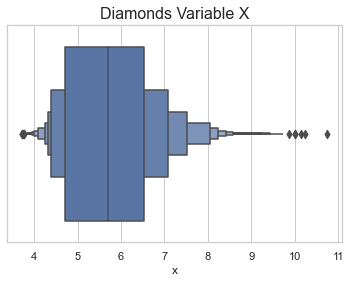

In [126]:
sns.boxenplot(x=diamonds["x"])
plt.title("Diamonds Variable X", fontsize =16)

Text(0.5, 1.0, 'Diamonds Variable y')

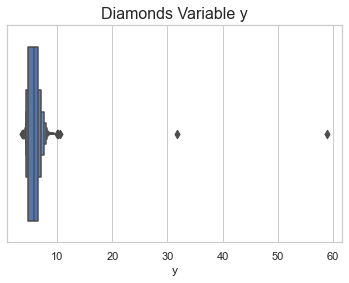

In [125]:
sns.boxenplot(x=diamonds["y"])
plt.title("Diamonds Variable y", fontsize =16)

Text(0.5, 1.0, 'Diamonds Variable z')

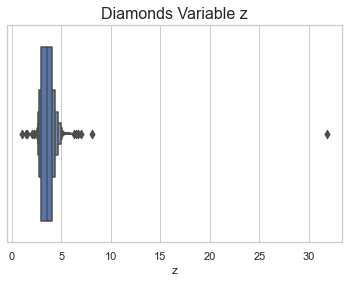

In [127]:
sns.boxenplot(x=diamonds["z"])
plt.title("Diamonds Variable z", fontsize =16)

Now we try to detect, how many outliers the dataset has and how to exclude them. With the code below we see a list of outliers, greater than a certain value for x, y or z.
Here we decided to

In [56]:
#diamonds.query("x>8.5 or z>6 or y>10").index
diamonds.query("x>9.8").index

Int64Index([3497, 7479, 13992, 20854, 38933, 41338], dtype='int64')

In [57]:
diamonds.query("y>10").index

Int64Index([12617, 13992, 20854, 23940, 41338], dtype='int64')

In [58]:
diamonds.query("z>6").index

Int64Index([1452, 3497, 4161, 7479, 12617, 13992, 20854, 31075, 37683, 38933,
            41338, 42250],
           dtype='int64')

In [59]:
diamonds.drop(diamonds.query("x>9.8").index, inplace=True)
diamonds.drop(diamonds.query("y>10").index, inplace=True)
diamonds.drop(diamonds.query("z>6").index, inplace=True)
diamonds.shape
# we have dropped 13 outliers

(45819, 10)

#### Heatmap

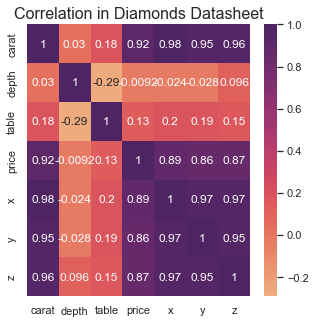

In [128]:
plt.figure(figsize=(5,5))
df_corr = diamonds.corr()
sns.heatmap(df_corr, cmap=sns.color_palette("flare", 50), annot=True)
plt.title("Correlation in Diamonds Datasheet", fontsize=16)
plt.show()

Dark red rectangles give a hint about correlations. Thus we see a value close to 1 for carat & price, as well as for carat and the x, y, z variables. This heatmap shows us which variables probably influence each other. For example does carat has an influence on the price.

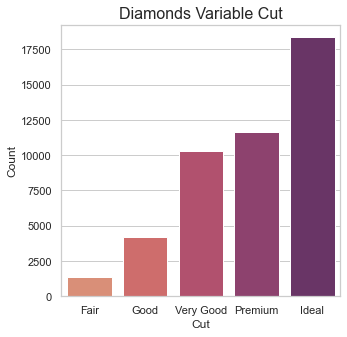

In [129]:
# Increasing quality order
# Fair (least best) < Good < Very Good < Premium < Ideal

plt.figure(figsize= (5,5))
sns.countplot(x= "cut", data= diamonds,
              palette=sns.color_palette("flare", 5),
              order=["Fair", "Good", "Very Good", "Premium", "Ideal"])
plt.xlabel("Cut")
plt.ylabel("Count")
plt.title("Diamonds Variable Cut", fontsize =16)
plt.show()

We see the dataset contains mostly diamonds with an ideal cut and barely with only a fair cut. Premium and very good cut have a rather similar count, and a good cut has the second lowest count in the data set.

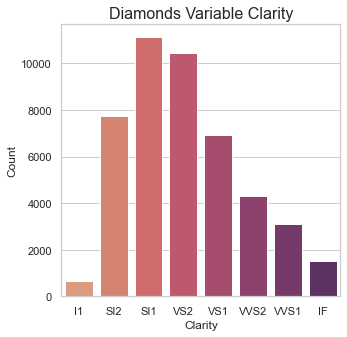

In [130]:
# Increasing quality order 
# I1 (Worst) < SI2 < SI1 < VS2 < VS1 < VVS2 < VVS1 < IF (best)
plt.figure(figsize= (5,5))
sns.countplot(x= "clarity", data= diamonds,
              order=["I1", "SI2", "SI1", "VS2", "VS1", "VVS2",
                     "VVS1", "IF"], palette= "flare")
plt.xlabel("Clarity")
plt.ylabel("Count")
plt.title("Diamonds Variable Clarity", fontsize =16)
plt.show()

For the clarity of the diamonds of the set we can see from the barchart above, that most of the diamonds are of quality SI2, SI1, VS2 and VS1, but the highest amount is of SI1, which is the third lowest quality in the range of clarity. The lowest (I1) and best (IF) clarity values are the rarest in the dataset.

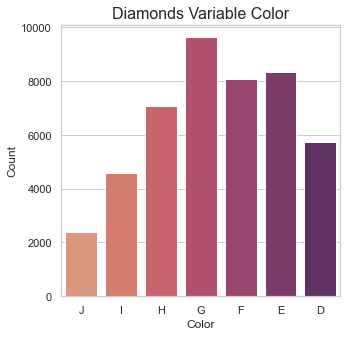

In [131]:
# Increasing quality order
# J (Worst) < I < H < G < F < E < D (best)
plt.figure(figsize= (5,5))
sns.countplot(x= "color", data= diamonds, palette= "flare", order=["J", "I", "H", "G", "F", "E", "D"])
plt.xlabel("Color")
plt.ylabel("Count")
plt.title("Diamonds Variable Color", fontsize =16)
plt.show()

For the quality the dataset shows the highest amount of diamonds with the color G, which is of mid-quality. The best color quality (D) is relatively often contained in the dataset and the lowest color quality (J) is the rarest within this dataset.

In [64]:
# set theme for the plot below
sns.set_theme(style="whitegrid")

Text(0.5, 1.0, 'Diamonds Price vs Carat')

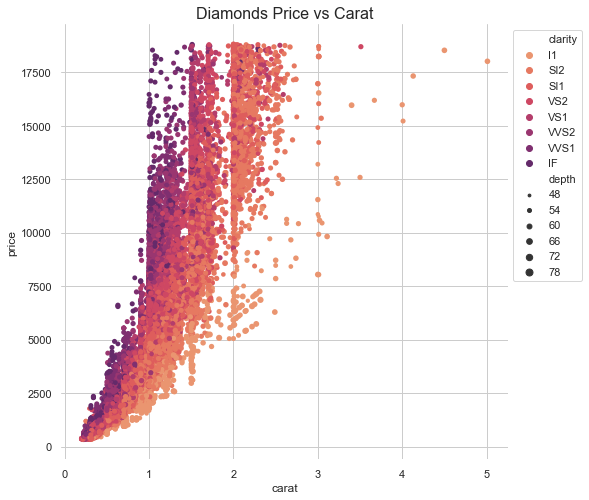

In [134]:
f, ax = plt.subplots(figsize=(8, 8))
# remove spines
sns.despine(f, left=True, bottom=True)
clarity_ranking = ["I1", "SI2", "SI1", "VS2", "VS1",
                   "VVS2", "VVS1","IF"]
sns.scatterplot(x="carat", y="price",
                hue="clarity", size="depth",
                palette="flare",
                hue_order=clarity_ranking,
                sizes=(1, 50), linewidth=0,
                data=diamonds, ax=ax, legend="brief")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.title("Diamonds Price vs Carat", fontsize =16)

This scatterplot shows us every data point as a little sphere in the grid. We plot price against carat and use clarity as hue and depth as size. This means, the darker the points, the better the quality regarding clarity (IF darkest color) and the bigger the points, the greater their depth. Hence this, the plot shows us, that diamonds with a better clarity have in general a lower value for carat and a lower depth. The other way arount do diamonds with a lower quality regarding clarity have a higher value in carat and a greater depth.

Text(0.5, 1.0, 'Diamonds Table vs Depth')

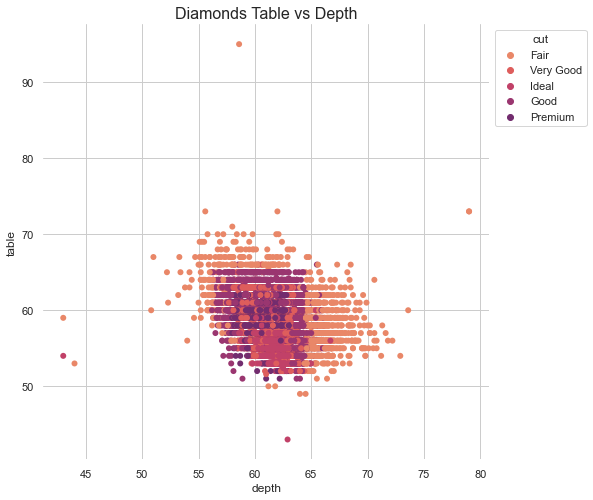

In [147]:
f, ax = plt.subplots(figsize=(8, 8))
# remove spines
sns.despine(f, left=True, bottom=True)
cut_ranking = ["Fair", "Very Good", "Ideal", "Good", "Premium"]
sns.scatterplot(x="depth", y="table",
                hue="cut", palette="flare",
                hue_order=cut_ranking,
                linewidth=0,
                data=diamonds, ax=ax, legend="brief")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.title("Diamonds Table vs Depth", fontsize =16)

In the above scatterplot the variables table (width) and depth (height) are plottet against each other with the variable cut as hue. We can see here, that the orange dots for a fair cut (best quality) have a higher variance, because they are more all over the place and the darker purple dots for a premium cut are condensed in the middle of the grid. So, diamonds with a premium or good cut tend to have a more narrow depth range between 55 and 65, wherease diamonds with a fair or very good cut tend to vary in depth between 50 and 75. It is difficult to determind concrete statement about the relation between the variables table and depth. We can say, that diamonds with a fair cut tend to have a higher value for the variables table and depth, which means the are wider and higher as diamonds with a ideal or better cut quality. 

In [67]:
import numpy as np
import scipy.stats as st
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

**Hier nochmal gucken, ob davon alle Imports gebraucht werden!**

### Create dummy variables

For the nexts steps some variables need to be transformed from strings to numbers, because the algorithms and mathematical operations can not be performed with strings. So the non-numerical variables will be rewritten as dummy variables where the numbers represent a string value. For example for the variable cut we have "Fair" as the best quality characteristic, which will be translatet into the number 1, standing from now on for the string "fair". With increasind whole numbers we so translate the cut quality into numbers. The higher the number, the less good the quality ("Ideal", the least good quality is translated into the number 5). Likewise we will proceed with the other two non-numerical variables.

In [68]:
diamonds.loc[diamonds['cut'] == 'Fair', 'cut'] = 1
diamonds.loc[diamonds['cut'] == 'Good', 'cut'] = 2
diamonds.loc[diamonds['cut'] == 'Very Good', 'cut'] = 3
diamonds.loc[diamonds['cut'] == 'Premium', 'cut'] = 4
diamonds.loc[diamonds['cut'] == 'Ideal', 'cut'] = 5

* D is the best color value, it usually correlates with lower carat values & lower price
* J is the lowest color value (lowest quality) it correllates with a higher carat value & higher price

"Diamond color is measured using the Gemological Institute of America, or GIA color scale which goes from D (colorless) all the way to Z (light yellow or brown in color). Between D and Z (the normal color range), there are numerous diamond color grades, ranging from near colorless to slightly yellow. [...]
Diamond color matters, but only to a certain point. The way we approach the 4Cs, we **separate cut and carat weight from color and clarity.**  
Cut and carat are positive traits (you want to maximize as much as possible). Color and clarity are negative traits that you want to make sure you don’t notice when looking at a diamond."  
**Source:** https://www.diamonds.pro/education/color/

In [69]:
diamonds.loc[diamonds['color'] == 'J', 'color'] = 1
diamonds.loc[diamonds['color'] == 'I', 'color'] = 2
diamonds.loc[diamonds['color'] == 'H', 'color'] = 3
diamonds.loc[diamonds['color'] == 'G', 'color'] = 4
diamonds.loc[diamonds['color'] == 'F', 'color'] = 5
diamonds.loc[diamonds['color'] == 'E', 'color'] = 6
diamonds.loc[diamonds['color'] == 'D', 'color'] = 7

"Diamond clarity is a qualitative metric that grades the visual appearance of each diamond. The fewer inclusions and blemishes a diamond has, the better its clarity grade will be."  
Order from flawless to 0 % eye-clean:  
IF < VVS1 < VVS2 < VS1 < VS2 < SI1 < SI2 < I1 < I2/I3  
**Source:** https://www.diamonds.pro/education/clarity/

In [70]:
diamonds.loc[diamonds['clarity'] == 'I1', 'clarity'] = 1
diamonds.loc[diamonds['clarity'] == 'SI2', 'clarity'] = 2
diamonds.loc[diamonds['clarity'] == 'SI1', 'clarity'] = 3
diamonds.loc[diamonds['clarity'] == 'VS2', 'clarity'] = 4
diamonds.loc[diamonds['clarity'] == 'VS1', 'clarity'] = 5
diamonds.loc[diamonds['clarity'] == 'VVS2', 'clarity'] = 6
diamonds.loc[diamonds['clarity'] == 'VVS1', 'clarity'] = 7
diamonds.loc[diamonds['clarity'] == 'IF', 'clarity'] = 8
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.83,4,5,4,60.2,60.0,3495,6.09,6.04,3.65
1,1.25,4,3,3,60.7,58.0,5027,7.04,6.99,4.26
2,0.41,4,7,3,60.5,60.0,791,4.77,4.81,2.90
3,0.31,2,3,4,63.1,57.0,489,4.28,4.31,2.71
4,0.30,5,4,8,62.2,55.0,844,4.30,4.32,2.68


### Feature Engineering

Source: https://medium.com/@polanitzer/a-regression-project-in-python-predict-diamonds-prices-based-on-cut-color-clarity-and-other-d856c0ba9a2c

For an easier understanding and less variables in the dataset we decided to join the variables x, y and z together in a volume variable.  
**--> MEHR ERKLÄRUNG HIER**

In [71]:
diamonds["vol"] = diamonds.x * diamonds.y * diamonds.z

In [72]:
diamonds.drop(["x","y","z"], axis=1, inplace=True)
diamonds.head()

,carat,cut,color,clarity,depth,table,price,vol
0,0.83,4,5,4,60.2,60.0,3495,134.260140
1,1.25,4,3,3,60.7,58.0,5027,209.632896
2,0.41,4,7,3,60.5,60.0,791,66.536730
3,0.31,2,3,4,63.1,57.0,489,49.990828
4,0.30,5,4,8,62.2,55.0,844,49.783680


### Split Training Sets

Starting into splitting the dataset into two sets, one for training the algorithm, one for testing it.  
First we drop the column for price, because this is the variable we want to predict based on the other variables.
Thus we claim the variable for price the dependent variable, because it's value depends on the other variables, and the other variables the independent variables, because they only influence the price variable. With this classification we set up the deductive hypothesis of the price being influenced by the other variables of the dataset and we will test this hypothesis with specific methods.

In [73]:
X = diamonds.drop(["price"], axis=1)
X.head()

,carat,cut,color,clarity,depth,table,vol
0,0.83,4,5,4,60.2,60.0,134.260140
1,1.25,4,3,3,60.7,58.0,209.632896
2,0.41,4,7,3,60.5,60.0,66.536730
3,0.31,2,3,4,63.1,57.0,49.990828
4,0.30,5,4,8,62.2,55.0,49.783680


In [74]:
y = diamonds["price"]
y.head()

0    3495
1    5027
2     791
3     489
4     844
Name: price, dtype: int64

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

### TEST

Das Datenset wird hier auf nur 200 Reihen reduziert, weil mit dem gesamten Datenset der Laptop die Grid Search iwie nicht ausführt, vor Abgabe bitte löschen! Dann auch die Grid Search mit den richtigen params starten!

In [95]:
# test with shorter dataset
diamonds_no_price = diamonds.drop(["price"], axis=1)
diamonds_short = diamonds_no_price.loc[0:199, :]
diamonds_short.shape

(200, 7)

In [98]:
diamonds_price = diamonds["price"]
diamonds_price_short = diamonds_price.loc[0:199]
diamonds_price_short.shape

(200,)

In [99]:
X_train_short, X_test_short, y_train_short, y_test_short = train_test_split(diamonds_short,
                                                                            diamonds_price_short,
                                                                            test_size=0.30,
                                                                            random_state=42)

### Modeling

#### Supervised Learning

In [34]:
import sklearn.linear_model as sl
linreg = sl.LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

#### *Linear Regression*

In [35]:
print("R squared of the Linear Regression on training set: {:.2%}".format(linreg.score(X_train, y_train)))
print("R squared of the Linear Regression on test set: {:.2%}".format(linreg.score(X_test, y_test)))

R squared of the Linear Regression on training set: 90.61%
R squared of the Linear Regression on test set: 91.00%


Text(0.5, 1.0, 'Diamonds Linear Regression')

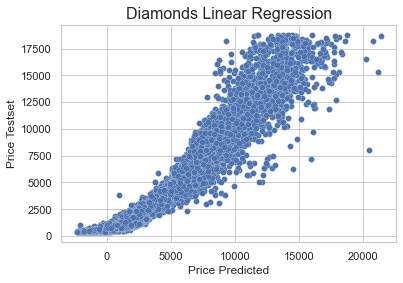

In [151]:
y_pred = linreg.predict(X_test)
sns.scatterplot(x=y_pred , y=y_test,
               linewidth=0.2)
plt.xlabel("Price Predicted")
plt.ylabel("Price Testset")
plt.title("Diamonds Linear Regression", fontsize =16)

With the linear regression we get the coefficient of determination, R2 (R squared). This value tells us, how good the model fits for the prediction, we are testing. R2 can be between 0 and 1, with 1 as the optimal outcome, indicating, that the prediction is a perfect fit for the data.  
In our case the value for R2 is 90.61% for the training and 91% for the test set, which are pretty good values!

#### *Random Forest Model*

In [37]:
import sklearn.ensemble as se
rf = se.RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [38]:
print('R squared of the Random Forest Regressor on training set: {:.2%}'.format(rf.score(X_train, y_train)))
print('R squared of the Random Forest Regressor on test set: {:.2%}'.format(rf.score(X_test, y_test)))

R squared of the Random Forest Regressor on training set: 99.73%
R squared of the Random Forest Regressor on test set: 98.12%


Text(0.5, 1.0, 'Diamonds Random Forest Regression')

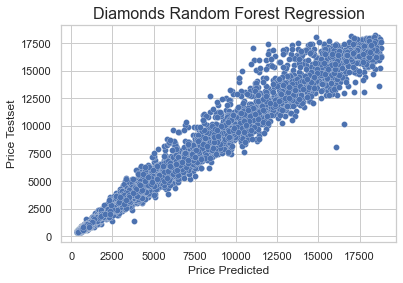

In [137]:
y_pred2 = rf.predict(X_test)
sns.scatterplot(x=y_test , y=y_pred2,
                palette="flare",
               linewidth=0.2)
plt.xlabel("Price Predicted")
plt.ylabel("Price Testset")
plt.title("Diamonds Random Forest Regression", fontsize =16)

Furthermore the random forest method was used for regression. This method is an ensemble method and can be used for classification and regression. Doing a regression with this method we also get the R2 value for the prediction.  
With this method we achieved even better values for R2 with 99.73% for the training and 98.12% for the test set.

In [40]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [41]:
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_test)

print("MAE: ",mean_absolute_error(y_test, y_pred))
print("R2: ", r2_score(y_test, y_pred))
print("MSE: ", mean_squared_error(y_test, y_pred))

MAE:  279.73334947482556
R2:  0.9809558002950318
MSE:  302024.7483332654


The errors for MAE (mean squared error) and MSE (mean absolute error) are quite high. Do we know why?

## Hyperparameter Tuning¶
### Grid Search

Source: https://www.kaggle.com/code/mikecalgary/diamond-model-optimization-for-99-accuracy

After testing the modelling we will try to perfect their performance. Because the linear model did not show as good results as the ensemble method with random forest, we will only continue with the latter.

In [105]:
from sklearn.model_selection import GridSearchCV
from math import sqrt

# Forest and Gradient parameters respectively
forestparam = {'max_depth': [ 11, 13, 15, 17], 'n_estimators': [100, 200, 500]}
gradientparam = {'max_depth': [1, 3, 5, 7], 'n_estimators': [100, 200, 500],
                 'learning_rate': [0.01, 0.1, 1.0]}

In [106]:
# performing grid search for RandomForestRegressor
forestgrid = GridSearchCV(RandomForestRegressor(random_state=64), forestparam)
forestgrid.fit(X_train_short, y_train_short)

GridSearchCV(estimator=RandomForestRegressor(random_state=64),
             param_grid={'max_depth': [11, 13, 15, 17],
                         'n_estimators': [100, 200, 500]})

In [108]:
forest_model = RandomForestRegressor(random_state=64, max_depth= 15, max_features=1.0, n_estimators= 500)
forest_model.fit(X_train_short, y_train_short)

RandomForestRegressor(max_depth=15, n_estimators=500, random_state=64)

In [144]:
# best model for the random forest regression
print(forestgrid.best_params_)
print('Best score: ', forestgrid.best_score_)

{'max_depth': 15, 'n_estimators': 200}
Best score:  0.9202747949762611


In [109]:
print(f'RandomForestRegressor:')
print(f"root mean squared error=>    training set:{sqrt(mean_squared_error(y_train_short, forest_model.predict(X_train_short))):.2f}   test set: {sqrt(mean_squared_error(y_test_short, forest_model.predict(X_test_short))):.2f}")
print(f"r-squared score=>    training set:{r2_score(y_train_short, forest_model.predict(X_train_short)):.6f}   test set: {r2_score(y_test_short, forest_model.predict(X_test_short)):.6f}")

RandomForestRegressor:
root mean squared error=>    training set:375.63   test set: 953.76
r-squared score=>    training set:0.992283   test set: 0.949109


Retraining the model with the fitted parameters.

In [111]:
# retrain model with best parameters
forest_model = RandomForestRegressor(random_state=64, max_depth= 15, max_features=1.0, n_estimators= 200)
forest_model.fit(X_train_short, y_train_short)

RandomForestRegressor(max_depth=15, n_estimators=200, random_state=64)

In [112]:
print(f'RandomForestRegressor:')
print(f"root mean squared error=>    training set:{sqrt(mean_squared_error(y_train_short, forest_model.predict(X_train_short))):.2f}   test set: {sqrt(mean_squared_error(y_test_short, forest_model.predict(X_test_short))):.2f}")
print(f"r-squared score=>    training set:{r2_score(y_train_short, forest_model.predict(X_train_short)):.6f}   test set: {r2_score(y_test_short, forest_model.predict(X_test_short)):.6f}")

RandomForestRegressor:
root mean squared error=>    training set:382.78   test set: 961.42
r-squared score=>    training set:0.991986   test set: 0.948288


We could improve the score from 0.92 to 0.94!
**CHECK VALUES WITH REAL DATA**

Lastly, we plot the predicted versus the actual plot of the best, most-optimized model, which of the Random Forest Regression with its hyperparameters optimized.

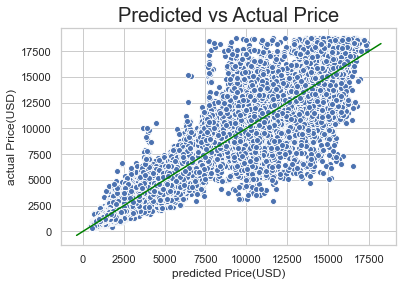

In [163]:
df = pd.DataFrame({'predicted Price(USD)':forest_model.predict(X), 'actual Price(USD)':y})
sns.scatterplot(data=df, x = 'predicted Price(USD)', y = 'actual Price(USD)', linewidth=0.9)
plt.title("Predicted vs Actual Price", fontsize =20)
axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = 1 * x_vals
plt.plot(x_vals, y_vals, '-', color="green")
plt.show()

### Evaluation

#### *Linear Regression*

In [138]:
d = {"true": y_test, "predicted": y_pred}
df_lr = pd.DataFrame(data=d)
df_lr["diff"] = df_lr["predicted"]-df_lr["true"]
df_lr

,true,predicted,diff
34819,10534,11405.366777,871.366777
6764,2942,3854.463967,912.463967
44853,939,1277.242379,338.242379
14290,6169,5758.340875,-410.659125
21613,816,1223.706825,407.706825
...,...,...,...
15652,675,-629.998072,-1304.998072
40737,731,1130.871080,399.871080
17007,1063,786.395288,-276.604712
37758,702,345.098701,-356.901299


Text(0.5, 1.0, 'Diamonds Prediction Price')

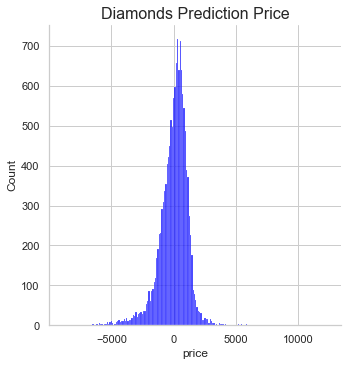

In [140]:
sns.displot(y_pred - y_test, color="blue")
plt.title("Diamonds Prediction Price", fontsize =16)

In [141]:
import sklearn.metrics as mt
print("Mean Absolute Error of the Linear Regression on test set is {:.2f}"
      .format(mt.mean_absolute_error(y_test,y_pred)))

Mean Absolute Error of the Linear Regression on test set is 845.55


"Our linear regression model was able to predict the price of every diamond in the test set with an error of ± $869.38 of the real price."

#### *Random Forest Regressor Model*

In [142]:
d = {"true": y_test, "predicted": y_pred2}
df_rf = pd.DataFrame(data=d)
df_rf["diff"] = df_rf["predicted"]-df_rf["true"]
df_rf

,true,predicted,diff
34819,10534,13046.910000,2512.910000
6764,2942,2808.408333,-133.591667
44853,939,893.490000,-45.510000
14290,6169,5913.584000,-255.416000
21613,816,948.480000,132.480000
...,...,...,...
15652,675,641.055000,-33.945000
40737,731,610.650000,-120.350000
17007,1063,870.923333,-192.076667
37758,702,834.538667,132.538667


In [143]:
print("Mean Absolute Error of the Random Forest Regressor on test set is {:.2f}"
      .format(mt.mean_absolute_error(y_test,y_pred2)))

Mean Absolute Error of the Random Forest Regressor on test set is 278.38


"Our random forest regressor model was able to predict the price of every diamond in the test set with an error of ± $277 of the real price."